In [10]:
%pylab inline

import pandas as pd
import plotly.express as px

import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics

from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
# Fixar comportamento aleatório
random.seed(38)

**Objetivo**
- Identificar quais características podem ser utilizadas para classificar a "saúde" de uma pessoa.

Em outras palavras: são necessários muitos exames para verificar que uma pessoa está com a sua saúde perfeita (exames cardíacos, cerebrais, de sangue, de urina, de fezes, etc.).
Será que é possível reduzir isso para um menor número? Essa é a tentativa desse estudo.

# Leitura dos Dados

In [13]:
df = pd.read_csv('data/performance_corporal.csv')
df.head(10)

,Id,Idade,Sexo,Altura (cm),Peso (Kg),% Gordura Corporal,Pressão Diastólica,Pressão Sistólica,Força do aperto de mão,Alongamento sentado (cm),Número de abdominais em 2 min,Salto em distância (cm),Classe Saúde
0,0,48.0,F,163.1,63.1,28.00000,65.0,118.0,30.4,34.0,34.0,154.0,A
1,1,28.0,M,171.8,64.7,11.60000,81.0,136.0,46.9,19.7,54.0,230.0,A
2,2,45.0,M,177.6,89.2,27.20000,70.0,125.0,46.8,15.8,49.0,225.0,D
3,3,47.0,M,164.4,72.9,25.30000,85.0,135.0,46.4,7.6,36.0,192.0,D
4,4,40.0,F,156.6,59.1,30.55772,94.0,149.0,32.9,24.1,58.0,172.0,A
5,5,30.0,M,168.9,74.0,26.90000,89.0,136.0,46.4,17.7,45.0,198.0,D
6,6,27.0,F,166.0,46.6,17.50000,65.0,104.0,23.1,21.5,23.0,176.0,C
7,7,34.0,M,180.0,72.5,16.50000,81.0,144.0,40.8,8.5,38.0,237.0,C
8,8,52.0,F,156.5,61.1,37.10000,93.0,152.0,28.8,21.9,21.0,147.0,B
9,9,22.0,M,178.4,78.6,15.70000,81.0,134.0,41.5,12.6,47.0,235.0,C


A classe saúde é composta dos seguintes níveis:
+ A: Saúde perfeita;
+ B: Saúde OK;
+ C: Alguns itens fora da escala recomendada;
+ D: Possui problemas significativos de saúde.

Para a coluna alongamento sentado, esse é o procedimento utilizado para medição (a título de curiosidade):

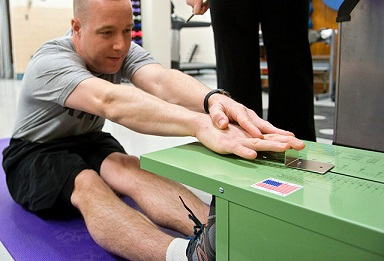

In [14]:
df = df.set_index('Id') # jogar essa coluna pro index
df

,Idade,Sexo,Altura (cm),Peso (Kg),% Gordura Corporal,Pressão Diastólica,Pressão Sistólica,Força do aperto de mão,Alongamento sentado (cm),Número de abdominais em 2 min,Salto em distância (cm),Classe Saúde
Id,,,,,,,,,,,,
0,48.0,F,163.1,63.1,28.00000,65.0,118.0,30.4,34.0,34.0,154.0,A
1,28.0,M,171.8,64.7,11.60000,81.0,136.0,46.9,19.7,54.0,230.0,A
2,45.0,M,177.6,89.2,27.20000,70.0,125.0,46.8,15.8,49.0,225.0,D
3,47.0,M,164.4,72.9,25.30000,85.0,135.0,46.4,7.6,36.0,192.0,D
4,40.0,F,156.6,59.1,30.55772,94.0,149.0,32.9,24.1,58.0,172.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...
8993,27.0,M,170.0,69.3,27.60000,68.0,123.0,25.9,10.2,47.0,207.0,D
8994,21.0,F,171.9,69.5,32.10000,98.0,142.0,27.4,17.6,34.0,141.0,C
8995,34.0,M,174.9,72.9,23.00000,82.0,125.0,38.9,4.9,53.0,214.0,C


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8998 entries, 0 to 8997
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Idade                          8998 non-null   float64
 1   Sexo                           8998 non-null   object 
 2   Altura (cm)                    8998 non-null   float64
 3   Peso (Kg)                      8998 non-null   float64
 4   % Gordura Corporal             8998 non-null   float64
 5   Pressão Diastólica             8998 non-null   float64
 6   Pressão Sistólica              8997 non-null   float64
 7   Força do aperto de mão         8998 non-null   float64
 8   Alongamento sentado (cm)       8998 non-null   float64
 9   Número de abdominais em 2 min  8998 non-null   float64
 10  Salto em distância (cm)        8998 non-null   float64
 11  Classe Saúde                   8998 non-null   object 
dtypes: float64(10), object(2)
memory usage: 913.9+ K

In [16]:
# Como verificar se uma coluna é float ou inteiro?
decimal = df['Pressão Diastólica'] - df['Pressão Diastólica'].round(0) # ver se existem elementos que possuem alguma casa decimal
decimal[decimal > 0]

Id
3780    0.4
3951    0.2
5670    0.2
8058    0.3
Name: Pressão Diastólica, dtype: float64

In [17]:
df.nunique().sort_values()

Sexo                                2
Classe Saúde                        4
Idade                              44
Número de abdominais em 2 min      79
Pressão Diastólica                 85
Pressão Sistólica                  87
Salto em distância (cm)           235
Altura (cm)                       456
% Gordura Corporal                482
Alongamento sentado (cm)          511
Força do aperto de mão            519
Peso (Kg)                        1184
dtype: int64

É interessante corrigir os tipos para evitar confusões.

In [18]:
df = df.astype({'Idade': int})

É importante analisar a distribuição da *target* para vermos o desbalanceamento das classes

In [19]:
df_cont = df['Classe Saúde'].value_counts()

print('Em valores absolutos:')
display(df_cont)

print('\nEm percentual:')
display(df_cont / df.shape[0] * 100)

unbalance = df_cont.max() / df_cont.min()
print(f'\n A taxa de desbalanceamento é de {unbalance:.2f}.')

px.bar(df_cont)

Em valores absolutos:


D    3349
C    3349
B    1500
A     800
Name: Classe Saúde, dtype: int64


Em percentual:


D    37.219382
C    37.219382
B    16.670371
A     8.890865
Name: Classe Saúde, dtype: float64


 A taxa de desbalanceamento é de 4.19.


# Tratamento dos dados
Nesse problema, já foi feita a remoção de outliers como uma etapa prévia. Sabendo disso, precisaremos das seguintes etapas:
+ Tratamento de nulos
+ *Encoding*

A normalização não se faz necessária por se tratar de um algoritmo de Gradient Boosting.
(Algoritmos de árvore não requerem normalização por serem algoritmos de decisão - se normalizar não faz diferença).

## Tratamento de Nulos

In [20]:
df.loc[df.isna().sum(axis=1) > 0, :]

,Idade,Sexo,Altura (cm),Peso (Kg),% Gordura Corporal,Pressão Diastólica,Pressão Sistólica,Força do aperto de mão,Alongamento sentado (cm),Número de abdominais em 2 min,Salto em distância (cm),Classe Saúde
Id,,,,,,,,,,,,
129,36,M,167.7,77.7,29.8,82.0,NaN,40.3,10.3,32.0,207.0,D


In [21]:
df_clean = df.dropna()
df_clean.loc[df_clean.isna().sum(axis=1) > 0, :]

,Idade,Sexo,Altura (cm),Peso (Kg),% Gordura Corporal,Pressão Diastólica,Pressão Sistólica,Força do aperto de mão,Alongamento sentado (cm),Número de abdominais em 2 min,Salto em distância (cm),Classe Saúde
Id,,,,,,,,,,,,


## *Encoding*


In [22]:
from sklearn.preprocessing import OrdinalEncoder

categorias = [
    ['M', 'F'], # Sexo
    ['D', 'C', 'B', 'A'], # Target
]

ord_enc = OrdinalEncoder(dtype=int, categories=categorias)
ord_enc.fit(df_clean[['Sexo', 'Classe Saúde']])

df_enc = df_clean.copy()
df_enc[['Sexo', 'Classe Saúde']] = ord_enc.transform(df_clean[['Sexo', 'Classe Saúde']])

df_enc

,Idade,Sexo,Altura (cm),Peso (Kg),% Gordura Corporal,Pressão Diastólica,Pressão Sistólica,Força do aperto de mão,Alongamento sentado (cm),Número de abdominais em 2 min,Salto em distância (cm),Classe Saúde
Id,,,,,,,,,,,,
0,48,1,163.1,63.1,28.00000,65.0,118.0,30.4,34.0,34.0,154.0,3
1,28,0,171.8,64.7,11.60000,81.0,136.0,46.9,19.7,54.0,230.0,3
2,45,0,177.6,89.2,27.20000,70.0,125.0,46.8,15.8,49.0,225.0,0
3,47,0,164.4,72.9,25.30000,85.0,135.0,46.4,7.6,36.0,192.0,0
4,40,1,156.6,59.1,30.55772,94.0,149.0,32.9,24.1,58.0,172.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8993,27,0,170.0,69.3,27.60000,68.0,123.0,25.9,10.2,47.0,207.0,0
8994,21,1,171.9,69.5,32.10000,98.0,142.0,27.4,17.6,34.0,141.0,1
8995,34,0,174.9,72.9,23.00000,82.0,125.0,38.9,4.9,53.0,214.0,1


## Separação treino-teste

In [23]:
from sklearn.model_selection import StratifiedKFold # KFold se não houver diferença entre grupos

# Escolha do número de folds
N_folds = 5

# Criação do Splitter
splitter = StratifiedKFold(
    n_splits=N_folds,
    random_state=38,
    shuffle=True)

# Separar X do y
df_sem_y = df_enc.copy().drop(columns='Classe Saúde')
df_y = df_enc.copy()['Classe Saúde'].to_frame()

# Listas para armazenarem nossos grupos da validação cruzada
X_train_fold = []
y_train_fold = []
X_test_fold = []
y_test_fold = []

for index_train, index_test in splitter.split(df_sem_y, df_y):
  X_train = df_sem_y.iloc[index_train]
  y_train = df_y.iloc[index_train]
  X_test = df_sem_y.iloc[index_test]
  y_test =  df_y.iloc[index_test]

  # adicionar na lista
  X_train_fold.append(X_train)
  y_train_fold.append(y_train)
  X_test_fold.append(X_test)
  y_test_fold.append(y_test)

In [24]:
X_test_fold[0]

,Idade,Sexo,Altura (cm),Peso (Kg),% Gordura Corporal,Pressão Diastólica,Pressão Sistólica,Força do aperto de mão,Alongamento sentado (cm),Número de abdominais em 2 min,Salto em distância (cm)
Id,,,,,,,,,,,
0,48,1,163.1,63.10,28.0,65.0,118.0,30.4,34.0,34.0,154.0
5,30,0,168.9,74.00,26.9,89.0,136.0,46.4,17.7,45.0,198.0
10,64,0,164.2,63.24,17.5,80.0,159.0,37.3,19.1,29.0,168.0
18,21,0,171.3,52.70,14.1,62.0,115.0,36.1,1.0,32.0,184.0
28,63,1,149.4,57.00,38.0,65.0,119.0,25.9,23.5,0.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...
8976,58,0,174.9,79.20,20.8,98.0,141.0,53.0,11.5,53.0,212.0
8983,30,0,174.1,70.70,18.0,72.0,130.0,37.4,17.9,50.0,230.0
8986,26,0,187.9,95.40,12.4,95.0,150.0,53.2,19.3,47.0,227.0


## Treino do modelo

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier

# Esse é o nosso dicionário que vai conter as métricas do treino
train_metrics = {
    'accuracy': [],
    'recall': [],
    'precision': [],
    'f1': []
}

# Esse é o nosso dicionário que vai conter as métricas do teste
test_metrics = {
    'accuracy': [],
    'recall': [],
    'precision': [],
    'f1': []
}

# Listas para guardar as previsões feitas pro grupo de treino e teste
y_hat_train_fold = []
y_hat_test_fold = []
y_hat_test_proba_fold = []

# Hiperparâmetros do modelo (Testar primeiro com configuração default)
hyper_dict = {
  'learning_rate': 0.07, # Taxa de aprendizado # quanto menor essa taxa, mais arvores voce vai precisar para chegar no seu aprendizado (recomendado)
  'n_estimators': 100, # Número de árvores
  'subsample': 0.8, # % das amostras que cada árvore vai receber
  'min_samples_leaf': 40, # Número mínimo de amostras numa folha (quando esse numero é 1 vc cria um overfiting)
  'max_depth': 3, # Profundidade máxima da árvore (quantas escolhas em sequencia eu posso fazer)
  'max_features': 9, # Quantidade de colunas que cada árvore receberá
  'verbose': 1, # Verbosidade (para acompanhar a 'fala' do algoritmo enquanto ele roda)
  'random_state': 42
}

# Executar para cada fold
for fold in range(N_folds):

  # Separar nos logs cada Fold
  print(f"\nFOLD {fold}\n")

  # Recuperando os dados desse fold específico
  X_train = X_train_fold[fold]
  X_test = X_test_fold[fold]
  y_train = y_train_fold[fold]
  y_test = y_test_fold[fold]

  # Criando o scaler aqui dentro para só escalar nos dados de treino
  x_scaler = StandardScaler()
  x_scaler.fit(X_train)

  # Aplicar a normalização
  X_train_norm = x_scaler.transform(X_train)
  X_test_norm = x_scaler.transform(X_test)

  # Treinar o modelo
  model = GradientBoostingClassifier(**hyper_dict)
  model.fit(X_train_norm, y_train.iloc[:,0])

  # Realizar as previsões
  y_hat_train = model.predict(X_train_norm)
  y_hat_test = model.predict(X_test_norm)
  y_hat_proba_test = model.predict_proba(X_test_norm)

  # Salvar previsões para o conjunto de treino
  y_hat_train_fold.append(y_hat_train)
  y_hat_test_fold.append(y_hat_test)
  y_hat_test_proba_fold.append(y_hat_proba_test)

  # Calcular métricas do treino
  acc = accuracy_score(y_train, y_hat_train)
  train_metrics['accuracy'].append(acc)

  rec = recall_score(y_train, y_hat_train, average='weighted') # media ponderada onde quem tem menos amostras é mais importante
  train_metrics['recall'].append(rec)

  precision = precision_score(y_train, y_hat_train, average='weighted')
  train_metrics['precision'].append(precision)

  f1 = f1_score(y_train, y_hat_train, average='weighted')
  train_metrics['f1'].append(f1)

  # Calcular métricas do teste
  acc = accuracy_score(y_test, y_hat_test)
  test_metrics['accuracy'].append(acc)

  rec = recall_score(y_test, y_hat_test, average='weighted')
  test_metrics['recall'].append(rec)

  precision = precision_score(y_test, y_hat_test, average='weighted')
  test_metrics['precision'].append(precision)

  f1 = f1_score(y_test, y_hat_test, average='weighted')
  test_metrics['f1'].append(f1)



FOLD 0

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.1976           0.0478            6.57s
         2           1.1558           0.0410            7.47s
         3           1.1220           0.0362            7.94s
         4           1.0875           0.0312            8.95s
         5           1.0599           0.0254            9.11s
         6           1.0341           0.0225            9.15s
         7           1.0168           0.0201            8.95s


         8           0.9901           0.0178            8.83s
         9           0.9798           0.0164            8.50s
        10           0.9572           0.0166            8.24s
        20           0.8343           0.0072            6.70s
        30           0.7831           0.0036            5.87s
        40           0.7323           0.0010            4.83s
        50           0.7018           0.0024            3.88s
        60           0.6801           0.0008            3.04s
        70           0.6611           0.0004            2.23s
        80           0.6440           0.0009            1.47s
        90           0.6244           0.0002            0.74s
       100           0.6146           0.0006            0.00s

FOLD 1

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.1964           0.0488            9.48s
         2           1.1552           0.0414            9.77s
         3           1.1241           0.0364            9.31

In [26]:
train_metrics

{'accuracy': [0.7607336390162568,
  0.7536473530637766,
  0.7521533759377604,
  0.7579883300916921,
  0.752570158377327],
 'recall': [0.7607336390162568,
  0.7536473530637766,
  0.7521533759377604,
  0.7579883300916921,
  0.752570158377327],
 'precision': [0.7678890930129098,
  0.7608456469110878,
  0.7584016241821963,
  0.7657463608397612,
  0.7595215936992809],
 'f1': [0.7507812801092484,
  0.745476113983553,
  0.7427388516341875,
  0.7507939168756279,
  0.7434766774939598]}

In [27]:
test_metrics

{'accuracy': [0.695,
  0.7066666666666667,
  0.7209560867148416,
  0.7092829349638688,
  0.7204002223457476],
 'recall': [0.695,
  0.7066666666666667,
  0.7209560867148416,
  0.7092829349638688,
  0.7204002223457476],
 'precision': [0.6998338785805016,
  0.7036832162324183,
  0.7182575177536732,
  0.7047417526094082,
  0.728421144152756],
 'f1': [0.6852680055860163,
  0.6940860792721116,
  0.7092959485861466,
  0.6961381053040526,
  0.710708364049993]}

## Avaliação de métricas

In [28]:
df_train_metrics = pd.DataFrame(train_metrics)
df_train_metrics

,accuracy,recall,precision,f1
0,0.760734,0.760734,0.767889,0.750781
1,0.753647,0.753647,0.760846,0.745476
2,0.752153,0.752153,0.758402,0.742739
3,0.757988,0.757988,0.765746,0.750794
4,0.752570,0.752570,0.759522,0.743477


In [29]:
df_train_metrics = df_train_metrics.mean(axis=0)
df_train_metrics

accuracy     0.755419
recall       0.755419
precision    0.762481
f1           0.746653
dtype: float64

In [30]:
df_test_metrics = pd.DataFrame(test_metrics)
df_test_metrics

,accuracy,recall,precision,f1
0,0.695000,0.695000,0.699834,0.685268
1,0.706667,0.706667,0.703683,0.694086
2,0.720956,0.720956,0.718258,0.709296
3,0.709283,0.709283,0.704742,0.696138
4,0.720400,0.720400,0.728421,0.710708


In [31]:
df_test_metrics = df_test_metrics.mean(axis=0)
df_test_metrics

accuracy     0.710461
recall       0.710461
precision    0.710988
f1           0.699099
dtype: float64

In [32]:
df_metrics = pd.concat([df_train_metrics, df_test_metrics], axis=1)
df_metrics

,0,1
accuracy,0.755419,0.710461
recall,0.755419,0.710461
precision,0.762481,0.710988
f1,0.746653,0.699099


In [33]:
df_metrics = df_metrics.rename(columns={0: 'Treino', 1: 'Teste'}).round(3)
df_metrics

,Treino,Teste
accuracy,0.755,0.710
recall,0.755,0.710
precision,0.762,0.711
f1,0.747,0.699


### Importância de cada variável

In [34]:
model.feature_importances_ # pega o ultimo que saiu do loop (temos 5, no caso o quinto)

array([0.05526144, 0.01765868, 0.0152448 , 0.11315328, 0.12018929,
       0.00192556, 0.00365637, 0.03264345, 0.44617994, 0.17780645,
       0.01628074])

In [35]:
df_importance = pd.DataFrame(
    data=model.feature_importances_.reshape(-1,1), # transforma o que era wuma linha em uma tabela
    index=X_train_fold[0].columns,
    columns=['Features']
)
df_importance = df_importance.sort_values(by='Features', ascending=False)
df_importance

,Features
Alongamento sentado (cm),0.446180
Número de abdominais em 2 min,0.177806
% Gordura Corporal,0.120189
Peso (Kg),0.113153
Idade,0.055261
Força do aperto de mão,0.032643
Sexo,0.017659
Salto em distância (cm),0.016281
Altura (cm),0.015245
Pressão Sistólica,0.003656


In [36]:
px.bar(df_importance, title='Importância de cada variável no modelo')

Mas qual modelo é esse? É o último da validação cruzada!

## Matriz de confusão

In [37]:
# Converter de 5 listas de y's para uma única lista com todos os valores
y_test_list = []
for y_fold in y_test_fold:
  y_test_list.extend(y_fold.iloc[:,0])

y_hat_test_list = []
for lista_fold in y_hat_test_fold:
  y_hat_test_list.extend(lista_fold)

y_test_hat_proba_list = []
for lista_fold in y_hat_test_proba_fold:
  y_test_hat_proba_list.extend(lista_fold)

index_list = []
for lista_fold in y_test_fold:
  index_list.extend(lista_fold.index)

In [38]:
# arrendondar as probabilidades
np.round(y_hat_test_proba_fold[0], 3)

array([[0.081, 0.342, 0.274, 0.303],
       [0.253, 0.295, 0.396, 0.057],
       [0.053, 0.276, 0.568, 0.103],
       ...,
       [0.229, 0.333, 0.269, 0.169],
       [0.941, 0.032, 0.023, 0.004],
       [0.726, 0.048, 0.22 , 0.007]])

In [39]:
y_hat_test_list[:10]

[1, 2, 2, 0, 0, 2, 1, 1, 2, 1]

In [40]:
confusion_matrix = pd.DataFrame(
    sklearn.metrics.confusion_matrix(y_test_list, y_hat_test_list),
    index=['real_D', 'real_C', 'real_B', 'real_A'],
    columns=['pred_D', 'pred_C', 'pred_B', 'pred_A'],
)

display(confusion_matrix.style.background_gradient(axis=None))

,pred_D,pred_C,pred_B,pred_A
real_D,2706,565,51,26
real_C,201,2813,179,156
real_B,78,832,420,170
real_A,11,165,171,453


## Análise de erro

In [41]:
y_test_hat_proba_list[:10]

[array([0.08076192, 0.34163905, 0.27435216, 0.30324687]),
 array([0.25277414, 0.29476296, 0.39573736, 0.05672555]),
 array([0.05282768, 0.27636827, 0.5682556 , 0.10254846]),
 array([9.88643284e-01, 8.82491002e-03, 1.80244746e-03, 7.29358490e-04]),
 array([0.85112584, 0.04969826, 0.04678526, 0.05239064]),
 array([0.04488417, 0.3204798 , 0.38378707, 0.25084897]),
 array([0.1045864 , 0.51463919, 0.3643086 , 0.01646581]),
 array([0.05658217, 0.4792248 , 0.45160299, 0.01259003]),
 array([0.0604516 , 0.32795589, 0.4890706 , 0.12252191]),
 array([0.29373253, 0.43641173, 0.15826233, 0.11159341])]

In [42]:
df_preds = pd.DataFrame(
    y_test_hat_proba_list,
    columns=['prob_D', 'prob_C', 'prob_B', 'prob_A'],
    index=index_list
)
df_preds

,prob_D,prob_C,prob_B,prob_A
0,0.080762,0.341639,0.274352,0.303247
5,0.252774,0.294763,0.395737,0.056726
10,0.052828,0.276368,0.568256,0.102548
18,0.988643,0.008825,0.001802,0.000729
28,0.851126,0.049698,0.046785,0.052391
...,...,...,...,...
8977,0.132328,0.566168,0.212301,0.089203
8982,0.970967,0.024963,0.002966,0.001104
8990,0.071611,0.399279,0.505421,0.023690
8991,0.104332,0.735757,0.154919,0.004992


In [43]:
df_preds = df_preds.sort_index()
df_preds

,prob_D,prob_C,prob_B,prob_A
0,0.080762,0.341639,0.274352,0.303247
1,0.027932,0.154038,0.236060,0.581969
2,0.582995,0.095516,0.258437,0.063053
3,0.600394,0.346721,0.041079,0.011805
4,0.018294,0.072019,0.136782,0.772905
...,...,...,...,...
8993,0.247689,0.486239,0.259287,0.006785
8994,0.325390,0.515042,0.131290,0.028278
8995,0.516342,0.468584,0.010576,0.004498
8996,0.086262,0.643997,0.234500,0.035241


In [44]:
# União combinando os índices
df_error = df_preds.join(
    df_sem_y
)
df_error

,prob_D,prob_C,prob_B,prob_A,Idade,Sexo,Altura (cm),Peso (Kg),% Gordura Corporal,Pressão Diastólica,Pressão Sistólica,Força do aperto de mão,Alongamento sentado (cm),Número de abdominais em 2 min,Salto em distância (cm)
0,0.080762,0.341639,0.274352,0.303247,48,1,163.1,63.1,28.00000,65.0,118.0,30.4,34.0,34.0,154.0
1,0.027932,0.154038,0.236060,0.581969,28,0,171.8,64.7,11.60000,81.0,136.0,46.9,19.7,54.0,230.0
2,0.582995,0.095516,0.258437,0.063053,45,0,177.6,89.2,27.20000,70.0,125.0,46.8,15.8,49.0,225.0
3,0.600394,0.346721,0.041079,0.011805,47,0,164.4,72.9,25.30000,85.0,135.0,46.4,7.6,36.0,192.0
4,0.018294,0.072019,0.136782,0.772905,40,1,156.6,59.1,30.55772,94.0,149.0,32.9,24.1,58.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,0.247689,0.486239,0.259287,0.006785,27,0,170.0,69.3,27.60000,68.0,123.0,25.9,10.2,47.0,207.0
8994,0.325390,0.515042,0.131290,0.028278,21,1,171.9,69.5,32.10000,98.0,142.0,27.4,17.6,34.0,141.0
8995,0.516342,0.468584,0.010576,0.004498,34,0,174.9,72.9,23.00000,82.0,125.0,38.9,4.9,53.0,214.0
8996,0.086262,0.643997,0.234500,0.035241,49,1,161.2,54.6,25.90000,84.0,126.0,31.1,15.2,37.0,130.0


Quem são os casos que eu quero analisar? Aqueles em que tenho maior "dúvida".

In [45]:
df_error['maior_prob'] = df_error[['prob_D', 'prob_C', 'prob_B', 'prob_A']].max(axis=1)
df_error

,prob_D,prob_C,prob_B,prob_A,Idade,Sexo,Altura (cm),Peso (Kg),% Gordura Corporal,Pressão Diastólica,Pressão Sistólica,Força do aperto de mão,Alongamento sentado (cm),Número de abdominais em 2 min,Salto em distância (cm),maior_prob
0,0.080762,0.341639,0.274352,0.303247,48,1,163.1,63.1,28.00000,65.0,118.0,30.4,34.0,34.0,154.0,0.341639
1,0.027932,0.154038,0.236060,0.581969,28,0,171.8,64.7,11.60000,81.0,136.0,46.9,19.7,54.0,230.0,0.581969
2,0.582995,0.095516,0.258437,0.063053,45,0,177.6,89.2,27.20000,70.0,125.0,46.8,15.8,49.0,225.0,0.582995
3,0.600394,0.346721,0.041079,0.011805,47,0,164.4,72.9,25.30000,85.0,135.0,46.4,7.6,36.0,192.0,0.600394
4,0.018294,0.072019,0.136782,0.772905,40,1,156.6,59.1,30.55772,94.0,149.0,32.9,24.1,58.0,172.0,0.772905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,0.247689,0.486239,0.259287,0.006785,27,0,170.0,69.3,27.60000,68.0,123.0,25.9,10.2,47.0,207.0,0.486239
8994,0.325390,0.515042,0.131290,0.028278,21,1,171.9,69.5,32.10000,98.0,142.0,27.4,17.6,34.0,141.0,0.515042
8995,0.516342,0.468584,0.010576,0.004498,34,0,174.9,72.9,23.00000,82.0,125.0,38.9,4.9,53.0,214.0,0.516342
8996,0.086262,0.643997,0.234500,0.035241,49,1,161.2,54.6,25.90000,84.0,126.0,31.1,15.2,37.0,130.0,0.643997


In [46]:
df_error.sort_values('maior_prob').round(3)

,prob_D,prob_C,prob_B,prob_A,Idade,Sexo,Altura (cm),Peso (Kg),% Gordura Corporal,Pressão Diastólica,Pressão Sistólica,Força do aperto de mão,Alongamento sentado (cm),Número de abdominais em 2 min,Salto em distância (cm),maior_prob
6197,0.276,0.218,0.279,0.227,22,1,166.7,68.92,32.8,75.0,119.0,32.2,20.6,38.0,189.0,0.279
2348,0.223,0.253,0.242,0.281,23,1,166.3,68.10,33.0,71.0,111.0,25.9,25.2,40.0,190.0,0.281
7315,0.284,0.232,0.249,0.234,27,0,183.7,81.80,25.1,70.0,119.0,44.7,20.2,57.0,230.0,0.284
721,0.285,0.168,0.288,0.259,64,0,172.7,81.30,26.3,84.0,154.0,47.2,22.2,36.0,177.0,0.288
5072,0.156,0.288,0.264,0.293,38,1,169.9,68.80,34.1,80.0,133.0,28.7,24.6,38.0,177.0,0.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,0.999,0.001,0.000,0.000,23,1,170.3,87.90,40.3,73.0,116.0,24.0,-5.5,1.0,116.0,0.999
6305,0.999,0.001,0.000,0.000,25,1,158.7,83.10,47.5,86.0,122.0,21.7,7.2,0.0,131.0,0.999
284,0.999,0.000,0.000,0.000,28,1,143.8,72.60,48.7,85.0,136.0,12.6,0.1,4.0,20.0,0.999
2682,0.999,0.001,0.000,0.000,22,0,175.2,86.00,34.0,71.0,121.0,44.3,4.3,0.0,170.0,0.999


## Questão: Qual diferença há entre usar os hiperparâmetros default e calibrá-los? Quanto de performance conseguimos ganhar?

Utilizando hiperparâmetros default:

F1 treino = 0.778

F1 Teste = 0.703

Alcançado:

F1 treino:

F1 teste:

## Pesquisa de satisfação
Pedimos por gentileza que preencham o questionário de avaliação do treinamento ASA 2023.

Cada feedback é precioso e nos ajuda a melhorarmos cada vez mais o treinamento para os participantes.

https://pt.surveymonkey.com/r/AvalASA